[0 1]
(2304, 7919)
(2304, 110)
(2304, 1)
Iteration Number  0
Iteration Number  10
Iteration Number  20
Iteration Number  30
Iteration Number  40
Iteration Number  50
Iteration Number  60
Iteration Number  70
Iteration Number  80
Iteration Number  90
Iteration Number  100
Iteration Number  110
Iteration Number  120
Iteration Number  130
Iteration Number  140
Iteration Number  150
Iteration Number  160
Iteration Number  170
Iteration Number  180
Iteration Number  190
Iteration Number  200
Iteration Number  210
Iteration Number  220
Iteration Number  230
Iteration Number  240
Iteration Number  250
Iteration Number  260
Iteration Number  270
Iteration Number  280
Iteration Number  290
Iteration Number  300
Iteration Number  310
Iteration Number  320
Iteration Number  330
Iteration Number  340
Iteration Number  350
Iteration Number  360
Iteration Number  370
Iteration Number  380
Iteration Number  390
Iteration Number  400
Iteration Number  410
Iteration Number  420
Iteration Number  430
It

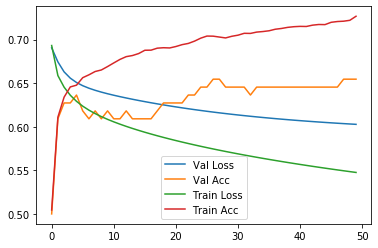

Final Accuracy:  [0.72660689]
Final Validatin Accuracy:  [0.65454545]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd


# Sigmoid function
def logistic(x):
    return 1.0 / (1.0 + np.exp(-1.0*x))


def hypothesisLogistic(X, coefficients, bias):
    
    # TODO: 3. This function should use matrix operations to push X through 
    # the logistic regression unti and return the results
    A = ((coefficients.T)@X) + bias
    
    predictedY = logistic(A)
    
    return predictedY


def calculateCrossEntropyCost(predictedY, Y):
    
    return (- 1 / Y.shape[1]) * np.sum(Y * np.log(predictedY) + (1 - Y) * (np.log(1 - predictedY)))  # compute cost
        


def gradient_descent_log(bias, coefficients, alpha, X, Y, max_iter, X_val, y_val):
    
    m = X.shape[1]
    
    # array is used to store change in cost function for each iteration of GD
    trainingLoss= []
    validationLoss= []
    trainingAccuracies = []
    validationAccuracies = []

    
    for num in range(0, max_iter):

        # Calculate predicted y values for current coefficient and bias values 
        predictedY = hypothesisLogistic(X, coefficients, bias)

        # TODO: 4. Calculate gradients for coefficients and bias
        E = predictedY - Y
        dlambda = (1/ (2 * m)) * X@(E.T)
        dbias = (1/ (2 * m)) * np.sum(E)
        
        # TODO: 5. Execute gradient descent update rule 
        coefficients -= alpha * dlambda
        bias -= alpha * dbias
    
        if num%10 == 0: 
            print ("Iteration Number ", num)
            
            # Cross Entropy Error  and accuracy for training data
            trainCost = calculateCrossEntropyCost(predictedY, Y)
            trainingLoss.append(trainCost)
            trainAccuracy = calculateAccuracy(predictedY, Y)
            trainingAccuracies.append(trainAccuracy)
            
            
            # Cross Entropy Error  and accuracy for validation data
            predictedYVal = hypothesisLogistic(X_val, coefficients, bias)
            valCost = calculateCrossEntropyCost(predictedYVal, y_val)
            validationLoss.append(valCost)
            valAccuracy = calculateAccuracy(predictedYVal, y_val)
            validationAccuracies.append(valAccuracy)
    
    
    plt.plot(validationLoss, label="Val Loss")
    plt.plot(validationAccuracies, label="Val Acc")
    plt.plot(trainingLoss, label="Train Loss")
    plt.plot(trainingAccuracies, label="Train Acc")
    plt.legend()
    
    plt.show();
    
    return bias, coefficients




def calculateAccuracy(predictedYValues, y_test):
    
    # Logistic regression is a probabilistic classifier.
    # If the probability is less than 0.5 set class to 0
    # If probability is greater than 0.5 set class to 1 
    predictedYValues[predictedYValues <= 0.5] = 0
    predictedYValues[predictedYValues > 0.5] = 1
    
    return np.sum(predictedYValues==y_test, axis=1)/y_test.shape[1]
    
    

def logisticRegression(X_train, y_train, X_validation, y_validation):

    
    # TODO 2: Create a column vector of coefficients for the model 
    coefficients = np.zeros(shape = (X_train.shape[0], 1))
    
    print(coefficients.shape)
     
    bias = 0.0
   
    alpha = 0.005 # learning rate
    
    max_iter=500


            
    # call gredient decent, and get intercept(bias) and coefficents
    bias, coefficients = gradient_descent_log(bias, coefficients, alpha, X_train, y_train, max_iter, X_validation, y_validation)
    
    predictedY = hypothesisLogistic(X_train, coefficients, bias)
    print ("Final Accuracy: ",calculateAccuracy(predictedY, y_train))
    
    predictedYVal = hypothesisLogistic(X_validation, coefficients, bias)
    print ("Final Validatin Accuracy: ",calculateAccuracy(predictedYVal, y_validation))
    
    


def main():
    
    df=pd.read_csv('data/train.csv', sep=',',header=None)
    trainData = df.values
    
    train_set_x_orig = trainData[:, 0:-1]
    train_set_y = trainData[:, -1]
    
    train_set_y = train_set_y.astype(np.int32)
    print (np.unique(train_set_y))

    df=pd.read_csv('data/validation.csv', sep=',',header=None)
    valData = df.values
    
    val_set_x_orig = valData[:, 0:-1]
    val_set_y = valData[:, -1]
    val_set_y = val_set_y.astype(np.int32)
 
     # Standarize the data
    scaler = preprocessing.StandardScaler()
    train_set_x_orig = scaler.fit_transform(train_set_x_orig)
    val_set_x_orig = scaler.fit_transform(val_set_x_orig)

    # Reshape the y data to that it becomes a real row vector
    train_set_y = train_set_y.reshape((1,len(train_set_y)))
    val_set_y = val_set_y.reshape((1,len(val_set_y)))


    # TODO: 1 Reshape the training data and test data so 
    # that the features becomes the rows of the matrix
    # Reshape train_set_x_orig
    # Reshape val_set_x_orig 
    train_set_x_orig = train_set_x_orig.T
    val_set_x_orig = val_set_x_orig.T
    
    print(train_set_x_orig.shape)
    print(val_set_x_orig.shape)
    
    logisticRegression(train_set_x_orig, train_set_y, val_set_x_orig, val_set_y)

    
main()